# Emission lines

In addition to creating and manipulating spectral energy distributions, `synthesizer` can also create `Line` objects, or more usefully collections of emission lines, `LineCollection` objects, that can be further analysed or manipulated. 

Like spectral energy distributions lines can be extracted directly from `Grid` objects or generated by `Galaxy` objects.

## Extracting lines from `Grid` objects

Grids that have been post-processed through CLOUDY also contain information on nebular emission lines. These can be loaded like regular grids, but there are a number of additional methods for working with lines as demonstrated in these examples.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import synthesizer.line_ratios as line_ratios
from synthesizer.grid import Grid
from synthesizer.line import (
    get_diagram_labels,
)

Let's first introduce the `line_ratios` module. This contains a set of useful definitions.

In [2]:
# the ID of H-alpha
print(line_ratios.Ha)

# the available in-built line ratios ...
print(line_ratios.available_ratios)

# ... and diagrams.
print(line_ratios.available_diagrams)

H 1 6562.80A
('BalmerDecrement', 'N2', 'S2', 'O1', 'R2', 'R3', 'R23', 'O32', 'Ne3O2')
('OHNO', 'BPT-NII')


Next let's initialise a grid:

In [3]:
grid_dir = "../../tests/test_grid"
grid_name = "test_grid"
grid = Grid(grid_name, grid_dir=grid_dir)

We can easily get a list of the available lines:

In [4]:
print(grid.available_lines)

['Al 2 1670.79A', 'Ar 3 7135.79A', 'Ar 3 7751.11A', 'Ar 4 2853.66A', 'C 1 1657.91A', 'C 1 1992.01A', 'C 1 2582.90A', 'C 2 1334.53A', 'C 2 1335.66A', 'C 2 1335.71A', 'C 2 2325.40A', 'C 2 2326.93A', 'C 3 1906.68A', 'C 3 1908.73A', 'C 4 1548.19A', 'C 4 1550.77A', 'Ca 2 7291.47A', 'Ca 2 7323.89A', 'Cl 2 8578.70A', 'Fe 2 1.25668m', 'Fe 2 1.27877m', 'Fe 2 1.29427m', 'Fe 2 1.32055m', 'Fe 2 1.32777m', 'Fe 2 1.37181m', 'Fe 2 1.53348m', 'Fe 2 1.59948m', 'Fe 2 1.64355m', 'Fe 2 1.66377m', 'Fe 2 1.67688m', 'Fe 2 1.71113m', 'Fe 2 1.74494m', 'Fe 2 1.79711m', 'Fe 2 1.80002m', 'Fe 2 1.80940m', 'Fe 2 1.89541m', 'Fe 2 1.95361m', 'Fe 2 2395.63A', 'Fe 2 2399.24A', 'Fe 2 2406.66A', 'Fe 2 2410.52A', 'Fe 2 2598.37A', 'Fe 2 2607.09A', 'Fe 2 2611.87A', 'Fe 2 2613.82A', 'Fe 2 2625.67A', 'Fe 2 2628.29A', 'Fe 2 2631.05A', 'Fe 2 2631.32A', 'Fe 2 4243.97A', 'Fe 2 4276.84A', 'Fe 2 4287.39A', 'Fe 2 4319.62A', 'Fe 2 4346.86A', 'Fe 2 4352.79A', 'Fe 2 4358.37A', 'Fe 2 4359.33A', 'Fe 2 4413.78A', 'Fe 2 4416.27A', 'Fe 2 44

This is also reported if we give the grid to the `print` function:

In [5]:
print(grid)

------------------------------
SUMMARY OF GRID
log10age: [ 6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1
 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. ] 
metallicity: [1.0e-05 1.0e-04 1.0e-03 2.0e-03 3.0e-03 4.0e-03 6.0e-03 8.0e-03 1.0e-02
 1.4e-02 2.0e-02 3.0e-02 4.0e-02] 
CMB: None 
T_floor: 100 
abundance_scalings_carbon: GalacticConcordance 
abundance_scalings_nitrogen: GalacticConcordance 
alpha: 0.0 
axes: ['log10age' 'metallicity'] 
axes_alternative: ['log10ages' 'metallicities'] 
cloudy_version: c23.01 
constant_density: True 
cosmic_rays: True 
depletion_model: Jenkins2009_Gunasekera2021 
depletion_scale: 0.5 
geometry: spherical 
grains: Orion 
hydrogen_density: 1000.0 
incident_axes: ['log10age' 'metallicity'] 
ionisation_parameter_model: ref 
iterate_to_convergence: True 
log10age: [ 6.   6.1  6.2  6.3  6.4  6.5 

Let's choose an age and metallicity we want to get predictions. The in-built method will find the nearest grid point:

In [6]:
log10age = 6.0  # log10(age/yr)
metallicity = 0.01
# find nearest grid point
grid_point = grid.get_grid_point((log10age, metallicity))

Let's get information on a single line, in this case H-beta:

In [7]:
line_id = line_ratios.Hb
line = grid.get_line(grid_point, line_id)
print(line)

----------
SUMMARY OF H 1 4861.32A
wavelength: 4861.3 Å
Npart: 1
<log10(luminosity/erg/s)>: 34.52
<equivalent width>: 450 Å
----------


/home/runner/work/synthesizer/synthesizer/src/synthesizer/grid.py:696: FutureWarning: Line objects should be created with a string id, not a list or tuple. This will be removed in a future version.
  Line(


We can do this for a combination of lines (e.g. a doublet) like this. Note: this sums the contribution of each line. If you want separate lines using the `get_lines` method described below.

In [8]:
line = grid.get_line(
    grid_point, [line_ratios.Hb, line_ratios.O3r, line_ratios.O3b]
)
print(line)

----------
SUMMARY OF H 1 4861.32A, O 3 5006.84A, O 3 4958.91A, H 1 4861.32A, O 3 5006.84A, O 3 4958.91A, H 1 4861.32A, O 3 5006.84A, O 3 4958.91A
wavelength: 4942.4 Å
Npart: 1
<log10(luminosity/erg/s)>: 35.47
<equivalent width>: 1359 Å
----------


We can also create a `LineCollection` a collection of lines which have methods for calculating ratios and diagrams. By default this will create a collection for all available lines but you can also specify which lines you want.

In [9]:
lines = grid.get_lines(grid_point)
print(lines)

----------
LINE COLLECTION
number of lines: 215
lines: ['He 2 1025.27A' 'O 6 1031.91A' 'O 6 1037.61A' 'He 2 1084.94A'
 'Si 2 1179.59A' 'Si 3 1206.50A' 'He 2 1215.13A' 'H 1 1215.67A'
 'O 5 1218.34A' 'N 5 1238.82A' 'N 5 1242.80A' 'Si 2 1260.42A'
 'Si 2 1264.74A' 'Si 2 1265.00A' 'O 1 1302.17A' 'O 1 1304.86A'
 'O 1 1306.03A' 'C 2 1334.53A' 'C 2 1335.66A' 'C 2 1335.71A'
 'Si 4 1393.75A' 'O 4 1399.78A' 'O 4 1401.16A' 'Si 4 1402.77A'
 'O 4 1404.81A' 'O 4 1407.38A' 'N 4 1486.50A' 'Si 2 1526.71A'
 'Si 2 1533.43A' 'C 4 1548.19A' 'C 4 1550.77A' 'Ne 4 1601.45A'
 'He 2 1640.41A' 'O 1 1641.31A' 'C 1 1657.91A' 'O 3 1660.81A'
 'O 3 1666.15A' 'Al 2 1670.79A' 'N 3 1749.67A' 'Mg 6 1806.00A'
 'Si 3 1882.71A' 'Si 3 1892.03A' 'C 3 1906.68A' 'C 3 1908.73A'
 'C 1 1992.01A' 'Si 7 2146.64A' 'O 3 2320.95A' 'C 2 2325.40A'
 'C 2 2326.93A' 'Fe 2 2395.63A' 'Fe 2 2399.24A' 'Fe 2 2406.66A'
 'Fe 2 2410.52A' 'C 1 2582.90A' 'Fe 2 2598.37A' 'Fe 2 2607.09A'
 'Fe 2 2611.87A' 'Fe 2 2613.82A' 'Fe 2 2625.67A' 'Fe 2 2628.29A'
 

We can measure some predifined line ratios:

In [10]:
ratio_id = "BalmerDecrement"
ratio = lines.get_ratio(ratio_id)
print(f"{ratio_id}: {ratio:.2f}")

BalmerDecrement: 2.92


Or loop over all pre-defined ratios:

In [11]:
for ratio_id in lines.available_ratios:
    ratio = lines.get_ratio(ratio_id)
    print(f"{ratio_id}: {ratio:.2f}")

BalmerDecrement: 2.92
N2: 0.08
S2: 0.06
O1: 0.01
R2: 0.97
R3: 5.97
R23: 9.77
O32: 6.13
Ne3O2: 0.48


We can also easily measure the ratio of an arbitrary set of lines:

In [12]:
lines.get_ratio(["Ne 4 1601.45A", "He 2 1640.41A"])

5.338282707249885e-05

In [13]:
lines.get_ratio(["Ne 4 1601.45A, He 2 1640.41A", "O 3 1660.81A"])

0.23419729663272387

We can plot a ratio against metallicity by looping over the metallicity grid:

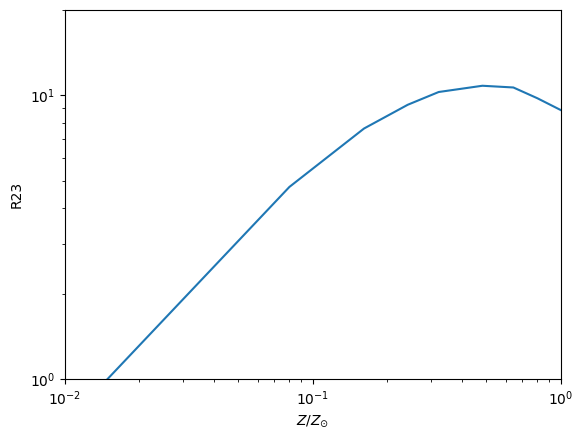

In [14]:
ratio_id = "R23"
ia = 0  # 1 Myr old for test grid
ratios = []
for iZ, Z in enumerate(grid.metallicity):
    grid_point = (ia, iZ)
    lines = grid.get_lines(grid_point)
    ratios.append(lines.get_ratio(ratio_id))

Zsun = grid.metallicity / 0.0124
plt.plot(Zsun, ratios)
plt.xlim([0.01, 1])
plt.ylim([1, 20])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$Z/Z_{\odot}$")
plt.ylabel(rf"{ratio_id}")
# plt.ylabel(rf'${get_ratio_label(ratio_id)}$')
plt.show()

We can also generate "diagrams" pairs of line ratios like the BPT diagram.

The `line_ratios` also contains some hardcoded literature dividing lines (e.g. Kewley / Kauffmann) that we can use.

/tmp/ipykernel_4451/636213194.py:17: RuntimeWarning: overflow encountered in power
  plt.plot(10**logNII_Ha, 10**logOIII_Hb, c="k", lw="2", alpha=0.3)


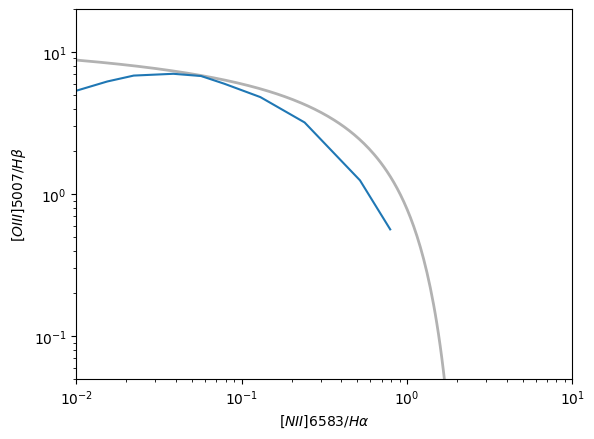

In [15]:
diagram_id = "BPT-NII"
ia = 0  # 1 Myr old for test grid
x = []
y = []
for iZ, Z in enumerate(grid.metallicity):
    grid_point = (ia, iZ)
    lines = grid.get_lines(grid_point)
    x_, y_ = lines.get_diagram(diagram_id)
    x.append(x_)
    y.append(y_)


# plot the Kewley SF/AGN dividing line

logNII_Ha = np.arange(-2.0, 1.0, 0.01)
logOIII_Hb = line_ratios.get_bpt_kewley01(logNII_Ha)
plt.plot(10**logNII_Ha, 10**logOIII_Hb, c="k", lw="2", alpha=0.3)

plt.plot(x, y)
plt.xlim([0.01, 10])
plt.ylim([0.05, 20])
plt.xscale("log")
plt.yscale("log")

# grab x and y labels, this time use "fancy" label ids
xlabel, ylabel = get_diagram_labels(diagram_id)

plt.xlabel(rf"${xlabel}$")
plt.ylabel(rf"${ylabel}$")
plt.show()

## Lines from `Galaxy` objects

Of course, you're mainly going to want to generate lines from components of a `Galaxy` (i.e. parametric or particle based stars or black holes). To do this you can utlise a component's `get_line_intrinsic` (intrinsic line emission), `get_line_screen` (line emission with a simple dust screen) or `get_line_attenuated` (line emission with more complex dust emission split into a nebular and ISM component) methods. These methods are analogous to those on a grid with the extra component specific processes, i.e. they return a `LineCollection` containing the requested lines which can either be singular, doublets, triplets or more.

In [16]:
from synthesizer.parametric import SFH, Stars, ZDist
from unyt import Myr

# Make a parametric galaxy
stellar_mass = 10**12
sfh = SFH.Constant(duration=100 * Myr)
metal_dist = ZDist.Normal(mean=0.01, sigma=0.05)
stars = Stars(
    grid.log10age,
    grid.metallicity,
    sf_hist=sfh,
    metal_dist=metal_dist,
    initial_mass=stellar_mass,
)

lc_intrinsic = stars.get_line_intrinsic(grid, line_ids="O 3 4363.21A")
print(lc_intrinsic)
lc_screen = stars.get_line_screen(
    grid, line_ids=("H 1 4340.46A, O 3 4958.91A", "O 3 5006.84A"), tau_v=0.5
)
print(lc_screen)
lc_att = stars.get_line_attenuated(
    grid,
    line_ids=["Ne 4 1601.45A", "He 2 1640.41A", "O 3 5006.84A"],
    tau_v_nebular=0.7,
    tau_v_stellar=0.5,
)
print(lc_att)

----------
LINE COLLECTION
number of lines: 1
lines: ['O 3 4363.21A']
available ratios: []
available diagrams: []
----------
----------
LINE COLLECTION
number of lines: 2
lines: ['H 1 4340.46A, O 3 4958.91A' 'O 3 5006.84A']
available ratios: []
available diagrams: []
----------
----------
LINE COLLECTION
number of lines: 3
lines: ['Ne 4 1601.45A' 'He 2 1640.41A' 'O 3 5006.84A']
available ratios: []
available diagrams: []
----------


In the case of a particle based galaxy you can either get the integrated line emission...

In [17]:
from synthesizer.load_data.load_camels import load_CAMELS_IllustrisTNG

# Get the stars from a particle based galaxy
stars = load_CAMELS_IllustrisTNG(
    "../../tests/data/",
    snap_name="camels_snap.hdf5",
    fof_name="camels_subhalo.hdf5",
    physical=True,
)[0].stars

lc_intrinsic = stars.get_line_intrinsic(grid, line_ids="O 3 4363.21A")
print(lc_intrinsic)
lc_screen = stars.get_line_screen(
    grid, line_ids=("H 1 4340.46A, O 3 4958.91A", "O 3 5006.84A"), tau_v=0.5
)
print(lc_screen)
lc_att = stars.get_line_attenuated(
    grid,
    line_ids=["Ne 4 1601.45A", "He 2 1640.41A", "O 3 5006.84A"],
    tau_v_nebular=0.7,
    tau_v_stellar=0.5,
)
print(lc_att)

In `load_stars`: one of either `initial_masses`, `ages` or `metallicities` is not provided, setting `stars` object to `None`
In `load_stars`: one of either `masses` or `metallicities` is not provided, setting `gas` object to `None`
In `load_stars`: one of either `initial_masses`, `ages` or `metallicities` is not provided, setting `stars` object to `None`
In `load_stars`: one of either `masses` or `metallicities` is not provided, setting `gas` object to `None`
In `load_stars`: one of either `initial_masses`, `ages` or `metallicities` is not provided, setting `stars` object to `None`
In `load_stars`: one of either `masses` or `metallicities` is not provided, setting `gas` object to `None`
In `load_stars`: one of either `initial_masses`, `ages` or `metallicities` is not provided, setting `stars` object to `None`
In `load_stars`: one of either `masses` or `metallicities` is not provided, setting `gas` object to `None`
In `load_stars`: one of either `initial_masses`, `ages` or `metallicitie

/opt/hostedtoolcache/Python/3.10.14/x64/lib/python3.10/site-packages/unyt/array.py:1949: RuntimeWarning: invalid value encountered in divide
  out_arr = func(


Or per particle line emission.

In [18]:
lc_intrinsic = stars.get_particle_line_intrinsic(grid, line_ids="O 3 4363.21A")
print(lc_intrinsic)
lc_screen = stars.get_particle_line_screen(
    grid, line_ids=("H 1 4340.46A, O 3 4958.91A", "O 3 5006.84A"), tau_v=0.5
)
print(lc_screen)
lc_att = stars.get_particle_line_attenuated(
    grid,
    line_ids=["Ne 4 1601.45A", "He 2 1640.41A", "O 3 5006.84A"],
    tau_v_nebular=0.7,
    tau_v_stellar=0.5,
)
print(lc_att)

----------
LINE COLLECTION
number of lines: 1
lines: ['O 3 4363.21A']
available ratios: []
available diagrams: []
----------
----------
LINE COLLECTION
number of lines: 2
lines: ['H 1 4340.46A, O 3 4958.91A' 'O 3 5006.84A']
available ratios: []
available diagrams: []
----------
----------
LINE COLLECTION
number of lines: 3
lines: ['Ne 4 1601.45A' 'He 2 1640.41A' 'O 3 5006.84A']
available ratios: []
available diagrams: []
----------
